<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stacking

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [3]:
# Generate a classification dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('nb', GaussianNB())
]

# Define meta learner
meta_learner = LogisticRegression(random_state=42)

# Create the StackingClassifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # Use cross-validation to train base learners
)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)




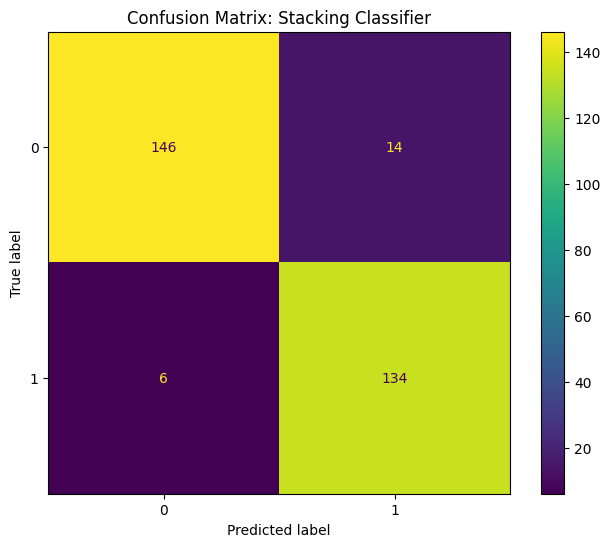

Base Learner Accuracies:
rf: 0.8900
svc: 0.9300
dt: 0.7967
nb: 0.8033

Stacking Classifier Accuracy: 0.9333


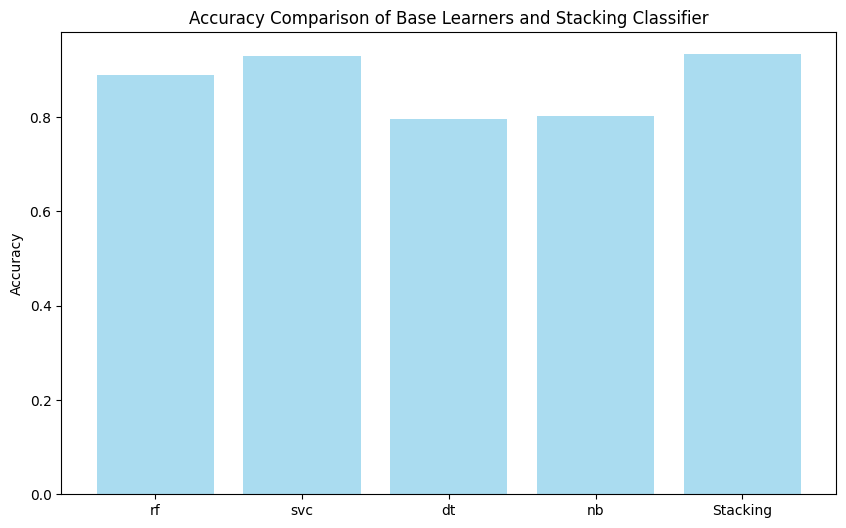

In [5]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(stacking_clf, X_test, y_test, ax=ax)
ax.set_title("Confusion Matrix: Stacking Classifier")
plt.show()

# Compare accuracy with individual base learners
base_accuracies = []
for name, clf in base_learners:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    base_accuracies.append((name, accuracy_score(y_test, y_pred)))

# Print results
print("Base Learner Accuracies:")
for name, acc in base_accuracies:
    print(f"{name}: {acc:.4f}")

print(f"\nStacking Classifier Accuracy: {accuracy_stacking:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(10, 6))
names = [name for name, _ in base_learners] + ['Stacking']
accuracies = [acc for _, acc in base_accuracies] + [accuracy_stacking]
plt.bar(names, accuracies, alpha=0.7, color='skyblue')
plt.title("Accuracy Comparison of Base Learners and Stacking Classifier")
plt.ylabel("Accuracy")
plt.show()